In [109]:
from bs4 import BeautifulSoup
import pandas as pd
import requests,time,random
import warnings
# adding entry into the specifications
# of the warnings filter.
warnings.filterwarnings('ignore')

In [110]:
url="https://topstartups.io/?sort=funding"

In [111]:
page=requests.get(url)

In [112]:
page

<Response [200]>

In [113]:
soup=BeautifulSoup(page.content,"html.parser")

In [114]:
for data in soup(['style', 'script']):
    data.decompose()
main_raw_data = ' '.join(soup.stripped_strings)


In [115]:
main_raw_data

"Top Startups 2022 — Funded by Sequoia, A16Z, Y Combinator Subscribe Add Startup Salary/Equity Jobs Startups Menu Startups Jobs Salary/Equity Add Startup Subscribe Find your hyper-growth startup Track who's newly funded by top investors. Powerful filters to save you time. Updates daily. HQ: Industry: AI/Machine Learning Analytics Biotech Collaboration Consumer Crypto/DeFi Data Science E-Commerce Education Enterprise Software FinTech Gaming Hardware Health Marketplaces Media Retail SaaS Sales/Marketing Security Space Sustainability Size: 1-10 employees 11-50 employees 51-100 employees 101-200 employees 201-500 employees 501-1000 employees 1001-5000 employees 5000+ employees Founded: 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 Stage: Pre-Seed Seed Series A Series B Series C Series D Series E Series F Series G Series H Series I Post-IPO Unknown Investor: Accel Andreessen Horowitz Benchmark Bessemer Founders Fund Khosla Ventures Kleiner Perkins Sequoia Y Combinator Find matches 

# Tokenization

In [116]:
from nltk.tokenize import RegexpTokenizer

In [117]:
tokenizer = RegexpTokenizer('\w+')

In [120]:
tokens = tokenizer.tokenize(main_raw_data)

In [121]:
tokens

['Top',
 'Startups',
 '2022',
 'Funded',
 'by',
 'Sequoia',
 'A16Z',
 'Y',
 'Combinator',
 'Subscribe',
 'Add',
 'Startup',
 'Salary',
 'Equity',
 'Jobs',
 'Startups',
 'Menu',
 'Startups',
 'Jobs',
 'Salary',
 'Equity',
 'Add',
 'Startup',
 'Subscribe',
 'Find',
 'your',
 'hyper',
 'growth',
 'startup',
 'Track',
 'who',
 's',
 'newly',
 'funded',
 'by',
 'top',
 'investors',
 'Powerful',
 'filters',
 'to',
 'save',
 'you',
 'time',
 'Updates',
 'daily',
 'HQ',
 'Industry',
 'AI',
 'Machine',
 'Learning',
 'Analytics',
 'Biotech',
 'Collaboration',
 'Consumer',
 'Crypto',
 'DeFi',
 'Data',
 'Science',
 'E',
 'Commerce',
 'Education',
 'Enterprise',
 'Software',
 'FinTech',
 'Gaming',
 'Hardware',
 'Health',
 'Marketplaces',
 'Media',
 'Retail',
 'SaaS',
 'Sales',
 'Marketing',
 'Security',
 'Space',
 'Sustainability',
 'Size',
 '1',
 '10',
 'employees',
 '11',
 '50',
 'employees',
 '51',
 '100',
 'employees',
 '101',
 '200',
 'employees',
 '201',
 '500',
 'employees',
 '501',
 '1000',

In [122]:
words = []
for word in tokens:
    words.append(word.lower())

In [123]:
words

['top',
 'startups',
 '2022',
 'funded',
 'by',
 'sequoia',
 'a16z',
 'y',
 'combinator',
 'subscribe',
 'add',
 'startup',
 'salary',
 'equity',
 'jobs',
 'startups',
 'menu',
 'startups',
 'jobs',
 'salary',
 'equity',
 'add',
 'startup',
 'subscribe',
 'find',
 'your',
 'hyper',
 'growth',
 'startup',
 'track',
 'who',
 's',
 'newly',
 'funded',
 'by',
 'top',
 'investors',
 'powerful',
 'filters',
 'to',
 'save',
 'you',
 'time',
 'updates',
 'daily',
 'hq',
 'industry',
 'ai',
 'machine',
 'learning',
 'analytics',
 'biotech',
 'collaboration',
 'consumer',
 'crypto',
 'defi',
 'data',
 'science',
 'e',
 'commerce',
 'education',
 'enterprise',
 'software',
 'fintech',
 'gaming',
 'hardware',
 'health',
 'marketplaces',
 'media',
 'retail',
 'saas',
 'sales',
 'marketing',
 'security',
 'space',
 'sustainability',
 'size',
 '1',
 '10',
 'employees',
 '11',
 '50',
 'employees',
 '51',
 '100',
 'employees',
 '101',
 '200',
 'employees',
 '201',
 '500',
 'employees',
 '501',
 '1000',

# Stopwords

In [124]:
from nltk.corpus import stopwords

In [125]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [126]:
stop_words = set(stopwords.words('english'))


In [127]:
filter_text = [word for word in words if not word in stop_words ]

In [128]:
filter_text

['top',
 'startups',
 '2022',
 'funded',
 'sequoia',
 'a16z',
 'combinator',
 'subscribe',
 'add',
 'startup',
 'salary',
 'equity',
 'jobs',
 'startups',
 'menu',
 'startups',
 'jobs',
 'salary',
 'equity',
 'add',
 'startup',
 'subscribe',
 'find',
 'hyper',
 'growth',
 'startup',
 'track',
 'newly',
 'funded',
 'top',
 'investors',
 'powerful',
 'filters',
 'save',
 'time',
 'updates',
 'daily',
 'hq',
 'industry',
 'ai',
 'machine',
 'learning',
 'analytics',
 'biotech',
 'collaboration',
 'consumer',
 'crypto',
 'defi',
 'data',
 'science',
 'e',
 'commerce',
 'education',
 'enterprise',
 'software',
 'fintech',
 'gaming',
 'hardware',
 'health',
 'marketplaces',
 'media',
 'retail',
 'saas',
 'sales',
 'marketing',
 'security',
 'space',
 'sustainability',
 'size',
 '1',
 '10',
 'employees',
 '11',
 '50',
 'employees',
 '51',
 '100',
 'employees',
 '101',
 '200',
 'employees',
 '201',
 '500',
 'employees',
 '501',
 '1000',
 'employees',
 '1001',
 '5000',
 'employees',
 '5000',
 '

# Analyzing the Text with NLTK


In [129]:
import nltk


In [130]:
text = nltk.Text(filter_text)


In [135]:
text

<Text: top startups 2022 funded sequoia a16z combinator subscribe...>

In [132]:
fdist = nltk.FreqDist(text)


In [133]:
type(fdist)


nltk.probability.FreqDist

In [134]:
fdist.most_common(20)


[('startups', 32),
 ('employees', 30),
 ('series', 24),
 ('jobs', 21),
 ('hq', 20),
 ('founded', 20),
 ('funding', 19),
 ('company', 19),
 ('quick', 18),
 ('facts', 18),
 ('take', 18),
 ('action', 18),
 ('see', 18),
 ('works', 18),
 ('check', 18),
 ('site', 18),
 ('view', 18),
 ('2022', 16),
 ('us', 12),
 ('new', 11)]

# Part of Speech Tagging


In [136]:
tagged = nltk.pos_tag(text)


In [137]:
tagged

[('top', 'JJ'),
 ('startups', 'NN'),
 ('2022', 'CD'),
 ('funded', 'VBD'),
 ('sequoia', 'NN'),
 ('a16z', 'NN'),
 ('combinator', 'NN'),
 ('subscribe', 'NN'),
 ('add', 'VBP'),
 ('startup', 'JJ'),
 ('salary', 'JJ'),
 ('equity', 'NN'),
 ('jobs', 'NNS'),
 ('startups', 'VBP'),
 ('menu', 'NN'),
 ('startups', 'NNS'),
 ('jobs', 'NNS'),
 ('salary', 'JJ'),
 ('equity', 'NN'),
 ('add', 'VBP'),
 ('startup', 'JJ'),
 ('subscribe', 'JJ'),
 ('find', 'VBP'),
 ('hyper', 'JJ'),
 ('growth', 'NN'),
 ('startup', 'VBP'),
 ('track', 'NN'),
 ('newly', 'RB'),
 ('funded', 'VBN'),
 ('top', 'JJ'),
 ('investors', 'NNS'),
 ('powerful', 'JJ'),
 ('filters', 'NNS'),
 ('save', 'VBP'),
 ('time', 'NN'),
 ('updates', 'JJ'),
 ('daily', 'JJ'),
 ('hq', 'NN'),
 ('industry', 'NN'),
 ('ai', 'VBP'),
 ('machine', 'NN'),
 ('learning', 'NN'),
 ('analytics', 'NNS'),
 ('biotech', 'JJ'),
 ('collaboration', 'NN'),
 ('consumer', 'NN'),
 ('crypto', 'NN'),
 ('defi', 'NN'),
 ('data', 'NNS'),
 ('science', 'NN'),
 ('e', 'NN'),
 ('commerce', 'NN'

In [201]:
# for ent in tagged:
#     print(ent[1])

In [204]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     /home/walkingtree/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [219]:
pos_tags = pos_tag(filter_text)
print(pos_tags)

[('top', 'JJ'), ('startups', 'NN'), ('2022', 'CD'), ('funded', 'VBD'), ('sequoia', 'NN'), ('a16z', 'NN'), ('combinator', 'NN'), ('subscribe', 'NN'), ('add', 'VBP'), ('startup', 'JJ'), ('salary', 'JJ'), ('equity', 'NN'), ('jobs', 'NNS'), ('startups', 'VBP'), ('menu', 'NN'), ('startups', 'NNS'), ('jobs', 'NNS'), ('salary', 'JJ'), ('equity', 'NN'), ('add', 'VBP'), ('startup', 'JJ'), ('subscribe', 'JJ'), ('find', 'VBP'), ('hyper', 'JJ'), ('growth', 'NN'), ('startup', 'VBP'), ('track', 'NN'), ('newly', 'RB'), ('funded', 'VBN'), ('top', 'JJ'), ('investors', 'NNS'), ('powerful', 'JJ'), ('filters', 'NNS'), ('save', 'VBP'), ('time', 'NN'), ('updates', 'JJ'), ('daily', 'JJ'), ('hq', 'NN'), ('industry', 'NN'), ('ai', 'VBP'), ('machine', 'NN'), ('learning', 'NN'), ('analytics', 'NNS'), ('biotech', 'JJ'), ('collaboration', 'NN'), ('consumer', 'NN'), ('crypto', 'NN'), ('defi', 'NN'), ('data', 'NNS'), ('science', 'NN'), ('e', 'NN'), ('commerce', 'NN'), ('education', 'NN'), ('enterprise', 'NN'), ('sof

In [220]:
named_entities = ne_chunk(pos_tags)
print(named_entities)

(S
  top/JJ
  startups/NN
  2022/CD
  funded/VBD
  sequoia/NN
  a16z/NN
  combinator/NN
  subscribe/NN
  add/VBP
  startup/JJ
  salary/JJ
  equity/NN
  jobs/NNS
  startups/VBP
  menu/NN
  startups/NNS
  jobs/NNS
  salary/JJ
  equity/NN
  add/VBP
  startup/JJ
  subscribe/JJ
  find/VBP
  hyper/JJ
  growth/NN
  startup/VBP
  track/NN
  newly/RB
  funded/VBN
  top/JJ
  investors/NNS
  powerful/JJ
  filters/NNS
  save/VBP
  time/NN
  updates/JJ
  daily/JJ
  hq/NN
  industry/NN
  ai/VBP
  machine/NN
  learning/NN
  analytics/NNS
  biotech/JJ
  collaboration/NN
  consumer/NN
  crypto/NN
  defi/NN
  data/NNS
  science/NN
  e/NN
  commerce/NN
  education/NN
  enterprise/NN
  software/NN
  fintech/JJ
  gaming/VBG
  hardware/NN
  health/NN
  marketplaces/NNS
  media/NNS
  retail/JJ
  saas/NN
  sales/NNS
  marketing/VBG
  security/NN
  space/NN
  sustainability/NN
  size/NN
  1/CD
  10/CD
  employees/NNS
  11/CD
  50/CD
  employees/NNS
  51/CD
  100/CD
  employees/NNS
  101/CD
  200/CD
  employees

In [213]:
!pip install chunker


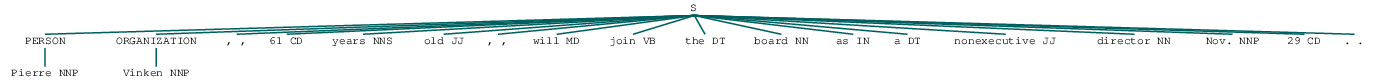

In [214]:
from nltk.corpus import treebank_chunk
from nltk.chunk import ne_chunk
  
ne_chunk(treebank_chunk.tagged_sents()[0])

In [215]:
def sub_leaves(tree, label):
    return [t.leaves() for t in tree.subtrees(lambda s: label() == label)]


In [216]:
tree = ne_chunk(treebank_chunk.tagged_sents()[0])

from chunkers import sub_leaves
print ("Named entities of PERSON : ",sub_leaves(tree, 'PERSON'))

print ("\nNamed entites of ORGANIZATION : ",sub_leaves(tree, 'ORGANIZATION'))


ModuleNotFoundError: No module named 'chunkers'

In [ ]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized[5:]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged, binary=True)
            namedEnt.draw()
    except Exception as e:
        print(str(e))


process_content()

In [253]:
# doc = nlp(str(soup_dos))
d = []
for ent in tagged:
    d.append((ent[1], ent[0]))
    df = pd.DataFrame(d, columns=('named entity', 'output'))
    df1=pd.DataFrame()
    ORG_named_entity=df.loc[df['named entity'] == 'JJ']['output']
    PERSON_named_entity=df.loc[df['named entity'] == 'NN']['output']
    MONEY_named_entity=df.loc[df['named entity'] == 'CD']['output']
#     MONEY_named_entity=df.loc[df['named entity'] == 'VBD']['output']
    
    GPE_named_entity=df.loc[df['named entity'] == 'VBP']['output']

#     ORG_named_entity = df.loc[df['named entity'] == 'ORG']['output']
#     PERSON_named_entity = df.loc[df['named entity'] == 'PERSON']['output']
#     GPE_named_entity = df.loc[df['named entity'] == 'GPE']['output']
#     MONEY_named_entity = df.loc[df['named entity'] == 'MONEY']['output']

In [256]:
lst=[ORG_named_entity, PERSON_named_entity,MONEY_named_entity,GPE_named_entity]

In [257]:
dframe = pd.DataFrame(lst)#,columns=('ORG_named_entity', 'PERSON_named_entity','GPE_named_entity','MONEY_named_entity'))

In [258]:
dframe.index=['ORG_named_entity', 'PERSON_named_entity','MONEY_named_entity','GPE_named_entity']

In [259]:
dframe.T

,ORG_named_entity,PERSON_named_entity,MONEY_named_entity,GPE_named_entity
0,top,NaN,NaN,NaN
1,NaN,startups,NaN,NaN
2,NaN,NaN,2022,NaN
4,NaN,sequoia,NaN,NaN
5,NaN,a16z,NaN,NaN
6,NaN,combinator,NaN,NaN
7,NaN,subscribe,NaN,NaN
8,NaN,NaN,NaN,add
9,startup,NaN,NaN,NaN
10,salary,NaN,NaN,NaN


In [222]:
df

,named entity,output
0,JJ,top
1,NN,startups
2,CD,2022
3,VBD,funded
4,NN,sequoia
5,NN,a16z
6,NN,combinator
7,NN,subscribe
8,VBP,add
9,JJ,startup


In [180]:
df

,named entity,output
0,JJ,top
1,NN,startups
2,CD,2022
3,VBD,funded
4,NN,sequoia
5,NN,a16z
6,NN,combinator
7,NN,subscribe
8,VBP,add
9,JJ,startup


In [197]:
df1 = pd.DataFrame(df1, columns=('ORG_named_entity', 'PERSON_named_entity','GPE_named_entity','MONEY_named_entity'))

In [198]:
df1

,ORG_named_entity,PERSON_named_entity,GPE_named_entity,MONEY_named_entity
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [36]:
# import modules and download packages
import nltk
nltk.download('words')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
nltk.download('state_union')
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

# process the text and print Named entities
# tokenization



[nltk_data] Downloading package words to
[nltk_data]     /home/walkingtree/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/walkingtree/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/walkingtree/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/walkingtree/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/walkingtree/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


In [37]:
# # text = state_union.raw()

# sample_text = dos_text#state_union.raw("2006-GWBush.txt")
# print(sample_text)
# custom_sent_tokenizer = PunktSentenceTokenizer(text)
# tokenized = custom_sent_tokenizer.tokenize(str(text))
# # function
# def get_named_entity():
# 	try:
# 		for i in tokenized:
# 			words = nltk.word_tokenize(i)
# 			tagged = nltk.pos_tag(words)
# 			namedEnt = nltk.ne_chunk(tagged, binary=False)
# 			namedEnt.draw()
# 	except:
# 		pass
# get_named_entity()

In [38]:
from pprint import pprint


In [54]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.tag import pos_tag

In [55]:
sent=dos_text
words= sent_tokenize(sent)
postags=pos_tag(words)

In [56]:
ne_tree = nltk.ne_chunk(postags,binary=False)
pprint(ne_tree)

Tree('S', [('\n\n\n\n\n\nTop Startups 2022 — Funded by Sequoia, A16Z, Y Combinator\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        (function(c,l,a,r,i,t,y){\n            c[a]=c[a]||function(){(c[a].q=c[a].q||[]).push(arguments)};\n            t=l.createElement(r);t.async=1;t.src="https://www.clarity.ms/tag/"+i;\n            y=l.getElementsByTagName(r)[0];y.parentNode.insertBefore(t,y);\n        })(window, document, "clarity", "script", "8fmvakruoa");\n    \n\n\n\n      window.dataLayer = window.dataLayer || [];\n      function gtag(){dataLayer.push(arguments);}\n      gtag(\'js\', new Date());\n\n      gtag(\'config\', \'UA-189306800-6\');\n    \n\n\n        (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n        new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n        j=d.createElement(s),dl=l!=\'dataLayer\'?', 'JJ'), ('\'&l=\'+l:\'\';j.async=true;j.src=\n        \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.p

In [60]:
type(ne_tree)

nltk.tree.Tree

In [57]:
ne_tree = nltk.ne_chunk(postags,binary=True)
pprint(ne_tree)

Tree('S', [('\n\n\n\n\n\nTop Startups 2022 — Funded by Sequoia, A16Z, Y Combinator\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        (function(c,l,a,r,i,t,y){\n            c[a]=c[a]||function(){(c[a].q=c[a].q||[]).push(arguments)};\n            t=l.createElement(r);t.async=1;t.src="https://www.clarity.ms/tag/"+i;\n            y=l.getElementsByTagName(r)[0];y.parentNode.insertBefore(t,y);\n        })(window, document, "clarity", "script", "8fmvakruoa");\n    \n\n\n\n      window.dataLayer = window.dataLayer || [];\n      function gtag(){dataLayer.push(arguments);}\n      gtag(\'js\', new Date());\n\n      gtag(\'config\', \'UA-189306800-6\');\n    \n\n\n        (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n        new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n        j=d.createElement(s),dl=l!=\'dataLayer\'?', 'JJ'), ('\'&l=\'+l:\'\';j.async=true;j.src=\n        \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.p

In [59]:
type(ne_tree)

nltk.tree.Tree

In [58]:
from nltk.chunk import tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(ne_tree)
pprint(iob_tagged)

[('\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  'Top Startups 2022 — Funded by Sequoia, A16Z, Y Combinator\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '\n'
  '        (function(c,l,a,r,i,t,y){\n'
  '            c[a]=c[a]||function(){(c[a].q=c[a].q||[]).push(arguments)};\n'
  '            '
  't=l.createElement(r);t.async=1;t.src="https://www.clarity.ms/tag/"+i;\n'
  '            y=l.getElementsByTagName(r)[0];y.parentNode.insertBefore(t,y);\n'
  '        })(window, document, "clarity", "script", "8fmvakruoa");\n'
  '    \n'
  '\n'
  '\n'
  '\n'
  '      window.dataLayer = window.dataLayer || [];\n'
  '      function gtag(){dataLayer.push(arguments);}\n'
  "      gtag('js', new Date());\n"
  '\n'
  "      gtag('config', 'UA-189306800-6');\n"
  '    \n'
  '\n'
  '\n'
  "        (function(w,d,s,l,i){w[l]=w[l]||[];w[l]

# spacy

In [44]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [45]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [264]:
import spacy

nlp = spacy.load('en_core_web_sm')

sentence = main_raw_data#"Apple is looking at buying U.K. startup for $1 billion"

doc = nlp(sentence)

for ent in doc.ents:
	print(ent.text, ent.label_)# ent.start_char, ent.end_char)


2022 DATE
Subscribe Add Startup PERSON
Track PERSON
daily DATE
AI/Machine Learning Analytics Biotech Collaboration Consumer Crypto/DeFi Data Science E-Commerce Education Enterprise Software ORG
1-10 CARDINAL
51-100 CARDINAL
101-200 CARDINAL
201-500 CARDINAL
501-1000 CARDINAL
5000 CARDINAL
2021 CARDINAL
1,216 CARDINAL
Sort PRODUCT
Recent Funding Highest Valuation ORG
Featured PERSON
first ORDINAL
Health Enterprise Software ORG
MedTech Quick PERSON
11-50 CARDINAL
2019 DATE
2021 DATE
Princeton GPE
Harvard ORG
MedTech NORP
$XMM+ MONEY
7 months DATE
Consumer Mobile App FinTech Quick ORG
New York GPE
New York GPE
US GPE
2020 DATE
Honey & Carta ORG
2021 DATE
1B+ MONEY
Northwestern ORG
🚀 Take ORG
View Jobs Applied Featured PERSON
4X CARDINAL
93% PERCENT
1-year DATE
Quick ORG
London GPE
England GPE
United Kingdom GPE
11-50 CARDINAL
2020 DATE
London Business School ORG
🇧 Take FAC
View Jobs Remote WORK_OF_ART
2019 DATE
Sequoia Accel PERSON
2022 DATE
3.0B MONEY
View Jobs Season Health ORG
Consumer

In [47]:
import re
import pandas as pd
import spacy
from spacy import displacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [262]:
doc = nlp(str(main_raw_data))
d = []
for ent in doc.ents:
    d.append((ent.label_, ent.text))
    df = pd.DataFrame(d, columns=('named entity', 'output'))
    ORG_named_entity = df.loc[df['named entity'] == 'ORG']['output']
    PERSON_named_entity = df.loc[df['named entity'] == 'PERSON']['output']
    GPE_named_entity = df.loc[df['named entity'] == 'GPE']['output']
    MONEY_named_entity = df.loc[df['named entity'] == 'MONEY']['output']

In [263]:
d

[('DATE', '2022'),
 ('PERSON', 'Subscribe Add Startup'),
 ('PERSON', 'Track'),
 ('DATE', 'daily'),
 ('ORG',
  'AI/Machine Learning Analytics Biotech Collaboration Consumer Crypto/DeFi Data Science E-Commerce Education Enterprise Software'),
 ('CARDINAL', '1-10'),
 ('CARDINAL', '51-100'),
 ('CARDINAL', '101-200'),
 ('CARDINAL', '201-500'),
 ('CARDINAL', '501-1000'),
 ('CARDINAL', '5000'),
 ('CARDINAL', '2021'),
 ('CARDINAL', '1,216'),
 ('PRODUCT', 'Sort'),
 ('ORG', 'Recent Funding Highest Valuation'),
 ('PERSON', 'Featured'),
 ('ORDINAL', 'first'),
 ('ORG', 'Health Enterprise Software'),
 ('PERSON', 'MedTech Quick'),
 ('CARDINAL', '11-50'),
 ('DATE', '2019'),
 ('DATE', '2021'),
 ('GPE', 'Princeton'),
 ('ORG', 'Harvard'),
 ('NORP', 'MedTech'),
 ('MONEY', '$XMM+'),
 ('DATE', '7 months'),
 ('ORG', 'Consumer Mobile App FinTech Quick'),
 ('GPE', 'New York'),
 ('GPE', 'New York'),
 ('GPE', 'US'),
 ('DATE', '2020'),
 ('ORG', 'Honey & Carta'),
 ('DATE', '2021'),
 ('MONEY', '1B+'),
 ('ORG', 'Nor

In [265]:
lst1=[ORG_named_entity, PERSON_named_entity,GPE_named_entity,MONEY_named_entity]

In [266]:
dataframe = pd.DataFrame(lst1)

In [267]:
dataframe.index=['ORG_named_entity', 'PERSON_named_entity','GPE_named_entity',',MONEY_named_entity']

In [269]:
dataframe.T

,ORG_named_entity,PERSON_named_entity,GPE_named_entity,",MONEY_named_entity"
1,NaN,Subscribe Add Startup,NaN,NaN
2,NaN,Track,NaN,NaN
4,AI/Machine Learning Analytics Biotech Collabor...,NaN,NaN,NaN
14,Recent Funding Highest Valuation,NaN,NaN,NaN
15,NaN,Featured,NaN,NaN
17,Health Enterprise Software,NaN,NaN,NaN
18,NaN,MedTech Quick,NaN,NaN
22,NaN,NaN,Princeton,NaN
23,Harvard,NaN,NaN,NaN
25,NaN,NaN,NaN,$XMM+


In [51]:
df

,named entity,output
0,PRODUCT,"content=""width"
1,ORG,"name=""viewport""/"
2,DATE,2022
3,CARDINAL,one
4,DATE,2022
5,DATE,2022
6,DATE,2022
7,DATE,2022
8,ORG,"name=""keywords""/>\n"
9,PERSON,"content=""Linda Zhang"


In [61]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

In [62]:
raw_text="The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."


In [63]:
text1= NER(raw_text)


In [64]:
for word in text1.ents:
    print(word.text,word.label_)

The Indian Space Research Organisation ORG
the national space agency ORG
India GPE
Bengaluru GPE
Department of Space ORG
India GPE
ISRO ORG
DOS ORG


In [65]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [66]:
displacy.render(text1,style="ent",jupyter=True)


In [67]:
text2= NER(raw_text2)


NameError: name 'raw_text2' is not defined